In [46]:
import pandas as pd
import numpy as np
from kick_cleaner import clean_kick_data, replace_kicker_with_num, kick_dictionary, model_comparison

[autoreload of sklearn.externals.six failed: Traceback (most recent call last):
  File "/Users/david/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/david/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 384, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/david/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 323, in update_generic
    update(a, b)
  File "/Users/david/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 275, in update_class
    old_obj = getattr(old, key)
  File "/Users/david/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py", line 87, in __get__
    setattr(obj, self.name, result)
AttributeError: 'NoneType' object has no attribute 'cStringIO'
]
[autoreload of sklearn.utils failed: Traceback (most recent call last):
  File "/Users/david/anaconda3/lib/p

In [47]:
kick_df = clean_kick_data('field_goals.csv')
kick_df.head()

,FieldGoalDistance,HomeTeam,Month,KickerName,FieldGoalResult
0,25.0,DEN,9,J.Tucker,1.0
1,30.0,DEN,9,J.Tucker,1.0
2,48.0,BUF,9,S.Gostkowski,1.0
3,33.0,BUF,9,S.Gostkowski,1.0
4,35.0,BUF,9,S.Gostkowski,1.0


**turns kickers and stadiums into numerical values, change them in the dataframe**

In [4]:
kickers_dict = kick_dictionary(kick_df, 'KickerName')
stadium_dict = kick_dictionary(kick_df, 'HomeTeam')


In [5]:
kick_df1 = replace_kicker_with_num(kick_df, 'KickerName')
kick_df2 = replace_kicker_with_num(kick_df1, 'HomeTeam')

## for log loss kickers/stadius have to be all dummy variables...

In [6]:
kick_df2.head()

,FieldGoalDistance,HomeTeam,Month,KickerName,FieldGoalResult
0,25.0,1,9,1,1.0
1,30.0,1,9,1,1.0
2,48.0,2,9,2,1.0
3,33.0,2,9,2,1.0
4,35.0,2,9,2,1.0


### splitting data and testing models 

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_log_error, mean_squared_error

In [8]:
test_df = kick_df2.sample(frac=0.200077, random_state=30)
final_test_x = test_df.iloc[:, :-1]
final_test_y = test_df.iloc[:, -1]

In [9]:
train_df = kick_df2.drop(test_df.index)
y = train_df.iloc[:, -1]
data = train_df.iloc[:, :-1]

### use stage predict for the gradient boost

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data,y)

logistic_model = LogisticRegression()
gradient_boost_model = GradientBoostingClassifier(learning_rate=0.005, max_depth=6, max_features='log2', min_samples_leaf=4, n_estimators=500, subsample=0.25)
random_forest_model = RandomForestClassifier(n_estimators=300, max_depth=3, verbose=1)

logistic_model.fit(X_train, y_train)
gradient_boost_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

p_random_forest = random_forest_model.predict_proba(X_test)
p_gradient_boost =  gradient_boost_model.predict_proba(X_test)
p_logistic = logistic_model.predict_proba(X_test)

ensemble_p = (p_random_forest[:,1] + p_gradient_boost[:,1] + p_logistic[:,1])/3

random_forest_ll = log_loss(y_test, p_random_forest )
gradient_boost_ll = log_loss(y_test, p_gradient_boost )
logistic_ll = log_loss(y_test, p_logistic )
ensemble_ll = log_loss(y_test, ensemble_p )

# fig, axs = plot_partial_dependence(gradient_boost_model, X = X_train, features = [0,1,2,3,(1,4)],
#                                        feature_names=list(X_train.columns),
#                                        n_jobs=1, grid_resolution=100, figsize = (20, 20))
# plt.show()                                       


print("Ensemble Log Loss " + str(ensemble_ll))
print("Gradient Boost Log Loss " + str(gradient_boost_ll))
print("Random Forest Log Loss " + str(random_forest_ll))
print("Logistic Log Loss " + str(logistic_ll))

Ensemble Log Loss 0.3612232438406258
Gradient Boost Log Loss 0.36457688424272433
Random Forest Log Loss 0.3691968603317342
Logistic Log Loss 0.3570606763894418


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


** by log loss, logistic regression is the best **

### using the logistic regression model to predict kick outcomes

predicting kicker probabilities by inputting kicker name, stadium, month

In [11]:
from kick_cleaner import kicker_dataframe

In [12]:
#  stadium_dict
kickers_dict

{'J.Tucker': 1,
 'S.Gostkowski': 2,
 'R.Bironas': 3,
 'M.Bryant': 4,
 'G.Hartley': 5,
 'N.Folk': 6,
 'R.Lindell': 7,
 'S.Hauschka': 8,
 'R.Gould': 9,
 'C.Sturgis': 10,
 'B.Cundiff': 11,
 'B.Walsh': 12,
 'S.Janikowski': 13,
 'P.Dawson': 14,
 'G.Zuerlein': 15,
 'J.Feely': 16,
 'D.Bailey': 17,
 'J.Brown': 18,
 'A.Henery': 19,
 'K.Forbath': 20,
 'R.Bullock': 21,
 'N.Novak': 22,
 'R.Succop': 23,
 'A.Vinatieri': 24,
 'M.Crosby': 25,
 'D.Carpenter': 26,
 'G.Gano': 27,
 'J.Scobee': 28,
 'M.Prater': 29,
 'S.Suisham': 30,
 'M.Nugent': 31,
 'S.Graham': 32,
 'C.Parkey': 33,
 'C.Santos': 34,
 'B.McManus': 35,
 'C.Catanzaro': 36,
 'P.Murray': 37,
 'C.Barth': 38,
 'T.Coons': 39,
 'A.Franks': 40,
 'J.Myers': 41,
 'J.Lambo': 42,
 'D.Hopkins': 43,
 'C.Boswell': 44,
 'R.Aguayo': 45,
 'W.Lutz': 46,
 'Z.Gonzalez': 47,
 'A.Rosas': 48,
 'K.Fairbairn': 49,
 'J.Elliott': 50,
 'H.Butker': 51}

In [42]:
hausch_kicks = kicker_dataframe(kickers_dict, stadium_dict, 'S.Hauschka', 'SEA', 10)
bailey_kicks = kicker_dataframe(kickers_dict, stadium_dict, 'D.Bailey', 'NYG', 10)
santos_kicks = kicker_dataframe(kickers_dict, stadium_dict, 'C.Santos', 'KC', 10)
aguayo_kicks = kicker_dataframe(kickers_dict, stadium_dict, 'R.Aguayo', 'TB', 10)

In [14]:
#essentially makes this but from 25 - 62 yards:

possible_kicks = pd.DataFrame({'FieldGoalDistance': [25, 30, 35, 40, 45, 50, 55, 60],
                              'HomeTeam': [15, 15, 15, 15, 15, 15, 15, 15],
                              'Month': [10, 10, 10, 10, 10, 10, 10, 10],
                              'KickerName': [45, 45, 45, 45, 45, 45, 45, 45]})

In [45]:
#over 90% from 25-39 yards
#over 80% up to 47 yards
#over 70% up to 51 yards
#logistic_model.predict_proba(hausch_kicks)
gradient_boost_model.predict_proba(hausch_kicks)

array([[0.05385017, 0.94614983],
       [0.0531076 , 0.9468924 ],
       [0.05878775, 0.94121225],
       [0.06967376, 0.93032624],
       [0.07246671, 0.92753329],
       [0.06319197, 0.93680803],
       [0.06539654, 0.93460346],
       [0.07207677, 0.92792323],
       [0.0705462 , 0.9294538 ],
       [0.08859929, 0.91140071],
       [0.09168981, 0.90831019],
       [0.09890782, 0.90109218],
       [0.10722418, 0.89277582],
       [0.11069171, 0.88930829],
       [0.10261111, 0.89738889],
       [0.10268251, 0.89731749],
       [0.09664084, 0.90335916],
       [0.1135748 , 0.8864252 ],
       [0.15095529, 0.84904471],
       [0.16007578, 0.83992422],
       [0.18995515, 0.81004485],
       [0.28409063, 0.71590937],
       [0.30704106, 0.69295894],
       [0.3036627 , 0.6963373 ],
       [0.25426173, 0.74573827],
       [0.28337271, 0.71662729],
       [0.30069941, 0.69930059],
       [0.32162781, 0.67837219],
       [0.37293872, 0.62706128],
       [0.35604519, 0.64395481],
       [0.

In [16]:
logistic_model.predict_proba(bailey_kicks)

array([[0.03261356, 0.96738644],
       [0.03595952, 0.96404048],
       [0.03963468, 0.96036532],
       [0.04366845, 0.95633155],
       [0.04809219, 0.95190781],
       [0.05293925, 0.94706075],
       [0.05824495, 0.94175505],
       [0.06404644, 0.93595356],
       [0.0703826 , 0.9296174 ],
       [0.07729383, 0.92270617],
       [0.08482178, 0.91517822],
       [0.09300902, 0.90699098],
       [0.10189851, 0.89810149],
       [0.11153316, 0.88846684],
       [0.12195507, 0.87804493],
       [0.13320483, 0.86679517],
       [0.14532057, 0.85467943],
       [0.158337  , 0.841663  ],
       [0.17228431, 0.82771569],
       [0.18718694, 0.81281306],
       [0.20306241, 0.79693759],
       [0.21992   , 0.78008   ],
       [0.23775953, 0.76224047],
       [0.25657021, 0.74342979],
       [0.27632961, 0.72367039],
       [0.29700281, 0.70299719],
       [0.31854186, 0.68145814],
       [0.34088551, 0.65911449],
       [0.36395936, 0.63604064],
       [0.38767641, 0.61232359],
       [0.

In [22]:
#over 90% up to 39 yards
#over 80% up to 47 yards
#over 70% up to 51 yards
bailey_kicks = gradient_boost_model.predict_proba(bailey_kicks)

In [31]:
bailey_prob_make = []
for i in bailey_kicks:
    bailey_prob_make.append(i[1])
len(bailey_prob_make)

37

In [18]:
# #over 90% up to 38 yards
# #over 80% up to 45 yards
# #over 70% up to 50 yards
# logistic_model.predict_proba(santos_kicks)
# gradient_boost_model.predict_proba(santos_kicks)
# # random_forest_model.predict_proba(santos_kicks)

In [19]:
# #over 90% up to 37 yards
# #over 80% up to 43 yards
# #over 70% up to 49 yards
# logistic_model.predict_proba(aguayo_kicks)

Find a way to compare the kickers more?

### visualization

In [20]:
import matplotlib.pyplot as plt

In [29]:
len(kick_distances)

38

Text(0.5,1,'Dan Bailey Kick Probability')

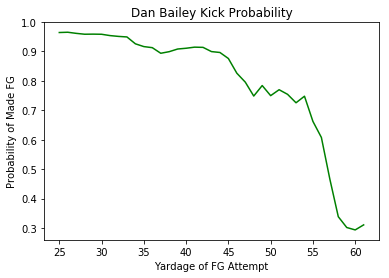

In [36]:
kick_distances = list(range(25, 62))
kick_prob = bailey_prob_make.copy()
plt.plot(kick_distances, kick_prob, color='green')
plt.xlabel('Yardage of FG Attempt')
plt.ylabel('Probability of Made FG')
plt.title('Dan Bailey Kick Probability')

In [ ]:
year = [1960, 1970, 1980, 1990, 2000, 2010]
pop_pakistan = [44.91, 58.09, 78.07, 107.7, 138.5, 170.6]
pop_india = [449.48, 553.57, 696.783, 870.133, 1000.
4, 1309.1]
plt.plot(year, pop_pakistan, color='g')
plt.plot(year, pop_india, color='orange')
plt.xlabel('Countries')
plt.ylabel('Population in million')
plt.title('Pakistan India Population till 2010')
plt.show()

In [39]:
len(list(range(25, 66)))

41

# run more gradient boost models with last 30 percent

is there a python package for scraping NFL data